In [1]:
import plotly.io as pio
pio.renderers.default = "png"

import sys
sys.path.append('../../')

from aztec_gddt.analysis.execute import execute_sim, complexity_desc
from aztec_gddt.analysis.visualizations import plot_agg_kpis, plot_inspect_vars
from aztec_gddt.analysis.metrics import *
from aztec_gddt.scenario_experiments import *
from aztec_gddt.types import *

In [2]:
from aztec_gddt.helper_types import ExperimentParamSpec

exp_spec = ExperimentParamSpec(
    params_swept_control={
    },
    params_swept_env={
        'JUICE_PER_GWEI_SCENARIO': [JuiceGweiExchangeRateScenario.Stochastic, JuiceGweiExchangeRateScenario.StrictlyIncreasing, JuiceGweiExchangeRateScenario.StrictlyDecreasing, JuiceGweiExchangeRateScenario.Constant],
        'JUICE_PER_GWEI_MEAN': [1e-15, 1e-14],
        'JUICE_PER_GWEI_COV': [0.1, 0.3]

    },
    N_timesteps=500,
    N_samples=1,
    N_config_sample=-1
)

In [3]:
CONTROL_PARAMS = list(exp_spec.params_swept_control.keys())

sim_df, exec_time = execute_sim(exp_spec, return_sim_df=True, upload=False, parallelize=False)


2025-02-05 12:54:23 - aztec-gddt-v2 - INFO
{exp_spec.label} Run invoked at 2025-02-05 12:54:23.339075

2025-02-05 12:54:23 - aztec-gddt-v2 - INFO
 dimensions: N_jobs=7, N_t=500, N_sweeps=4, N_mc=1, N_trajectories=4, N_measurements=2,000

2025-02-05 12:54:23 - aztec-gddt-v2 - INFO
 starting at 2025-02-05 12:54:23.339733, (0:00:00.000658 since invoke)

2025-02-05 12:54:24 - aztec-gddt-v2 - INFO
 Run finished at 2025-02-05 12:54:24.372662, (0:00:01.032929 since sim start)

2025-02-05 12:54:24 - aztec-gddt-v2 - INFO
 Run Performance Numbers; Duration (s): 1.03, Measurements Per Second: 1,936.24 M/s, Measurements per Job * Second: 276.61 M/(J*s), Jobs * Seconds per Trajectory : 1.81


In [5]:
print(complexity_desc(exp_spec))


    #### Computational Complexity:
    1. Total number of parameter combinations: 4
    2. Total number of Monte Carlo runs per parameter combination: 1
    3. Total number of trajectories: 4
    4. Total number of timesteps per trajectory: 500
    5. Total number of state measurements: 2,000
    


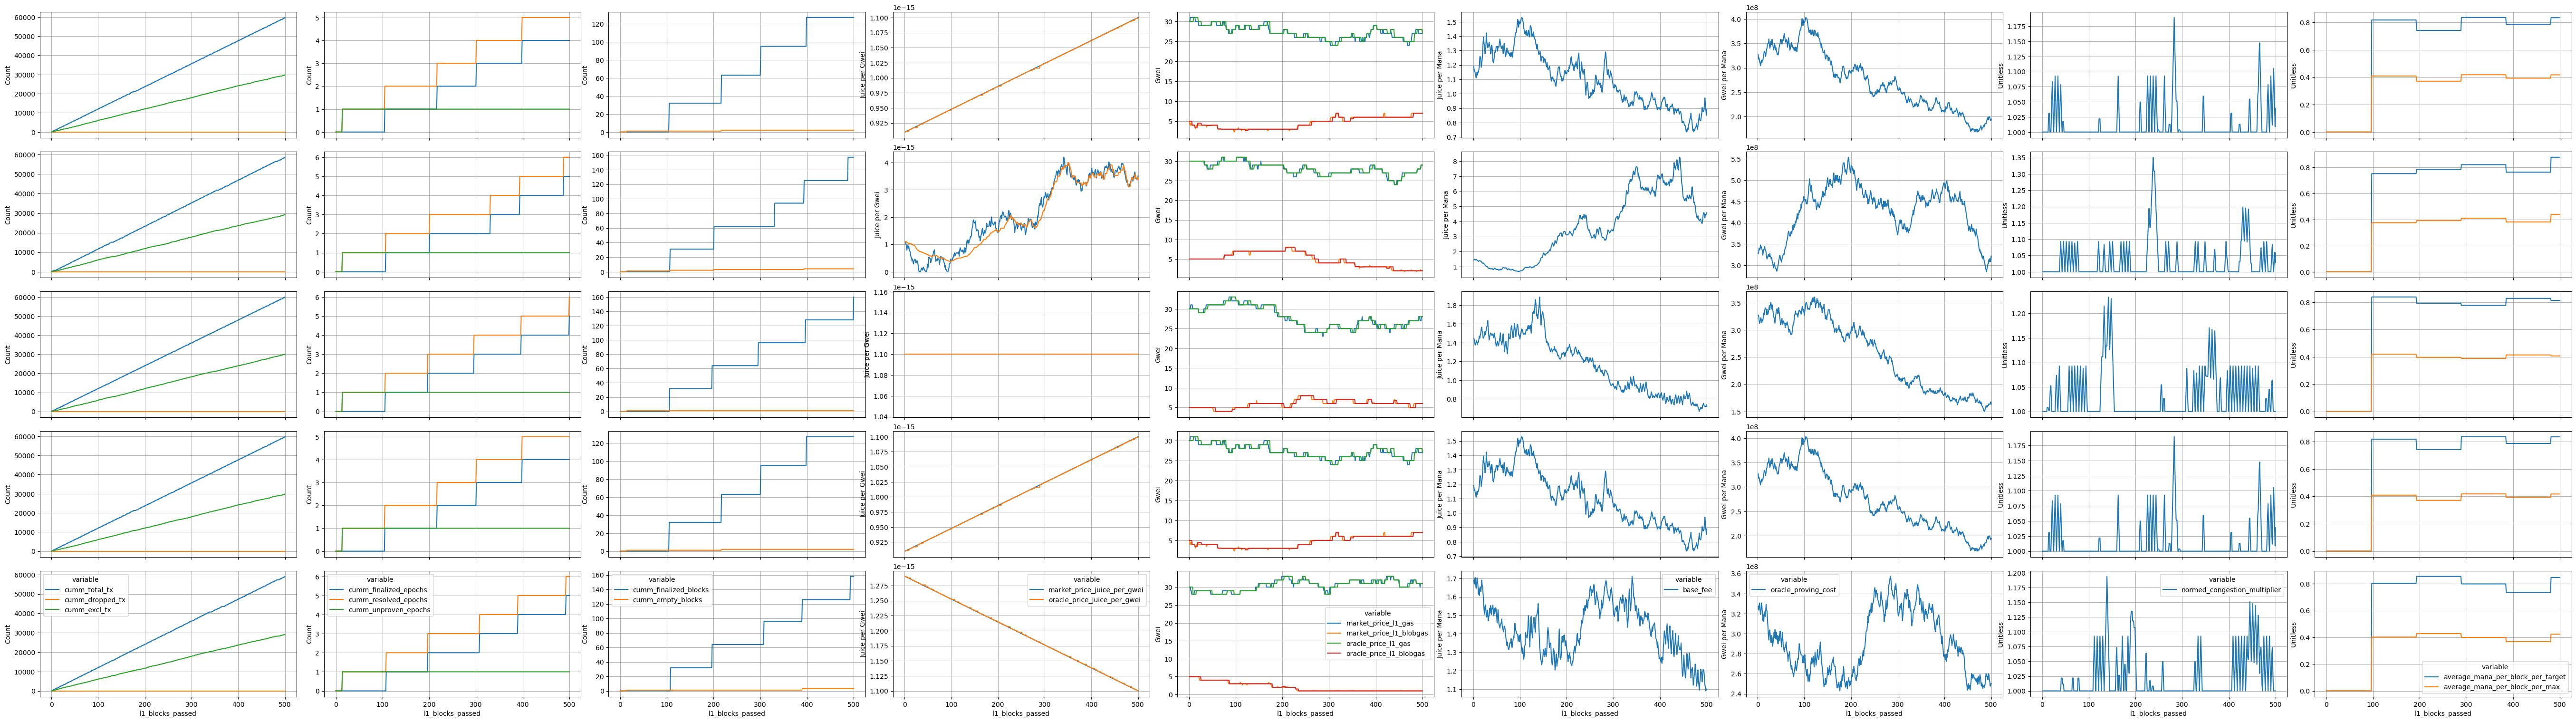

In [6]:
plot_inspect_vars(sim_df)

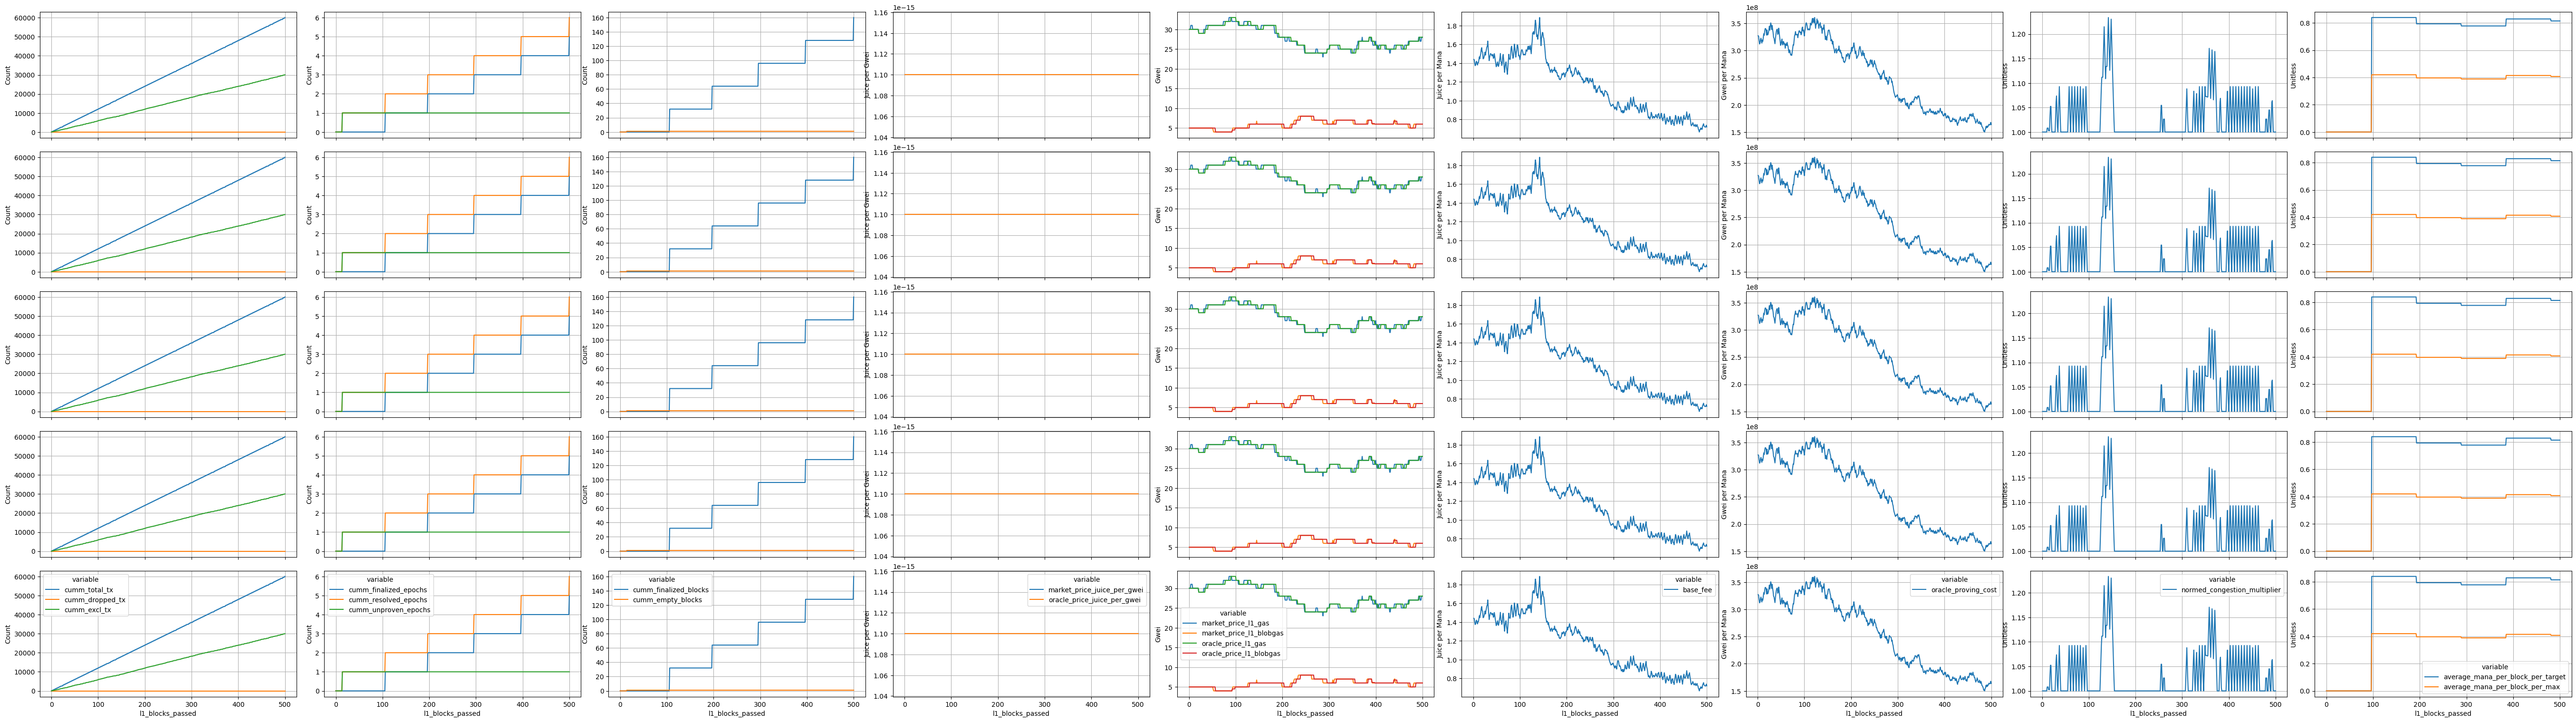

In [24]:
plot_inspect_vars(sim_df[sim_df.JUICE_PER_GWEI_SCENARIO == JuiceGweiExchangeRateScenario.Constant])

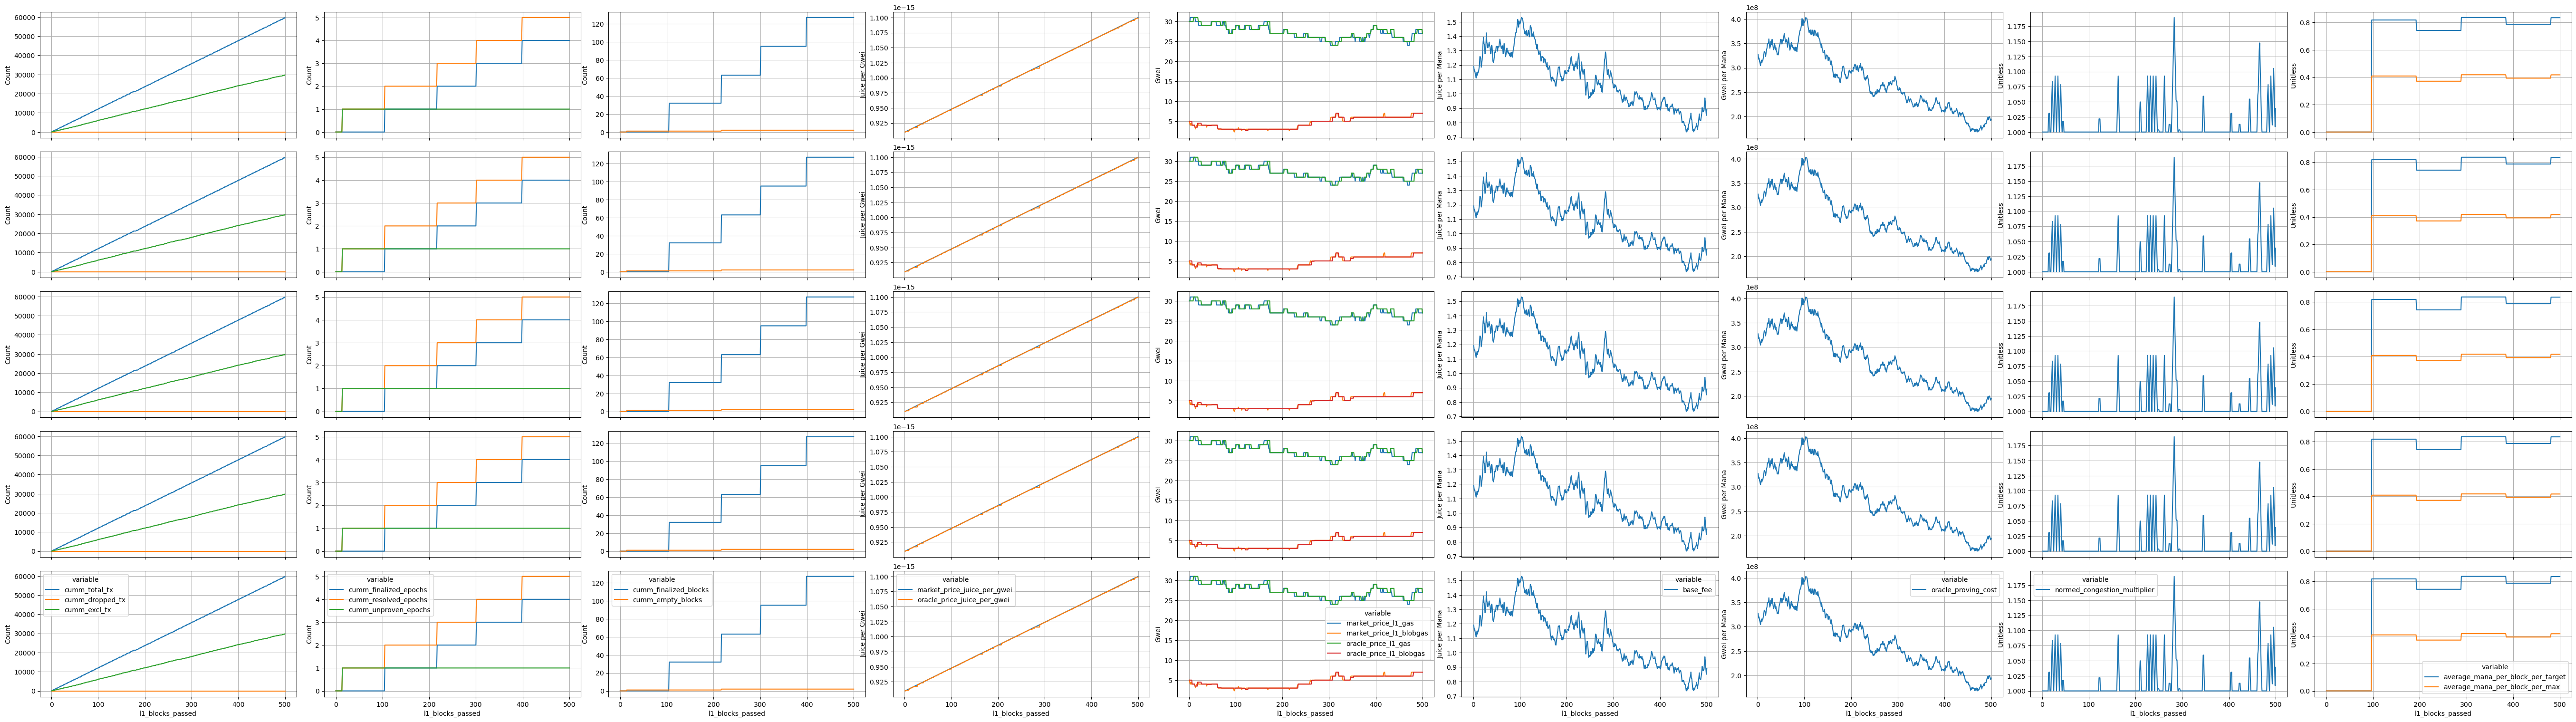

In [25]:
plot_inspect_vars(sim_df[sim_df.JUICE_PER_GWEI_SCENARIO == JuiceGweiExchangeRateScenario.StrictlyIncreasing])

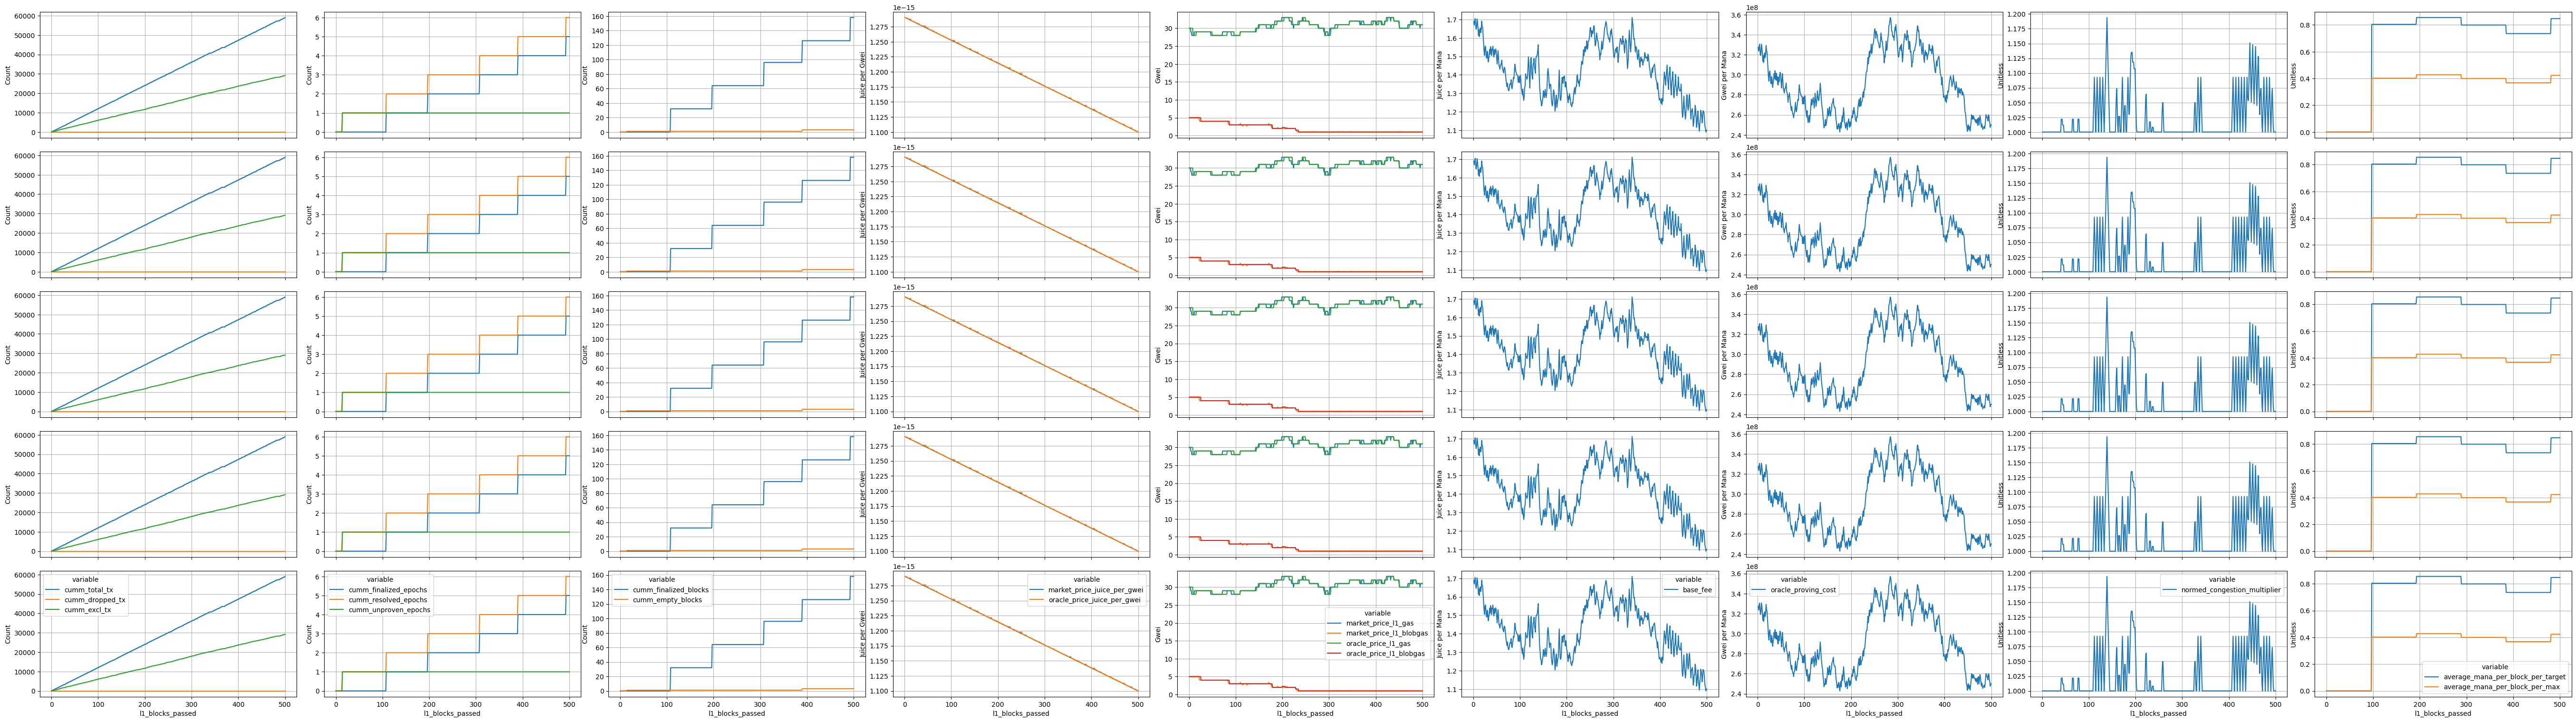

In [26]:
plot_inspect_vars(sim_df[sim_df.JUICE_PER_GWEI_SCENARIO == JuiceGweiExchangeRateScenario.StrictlyDecreasing])

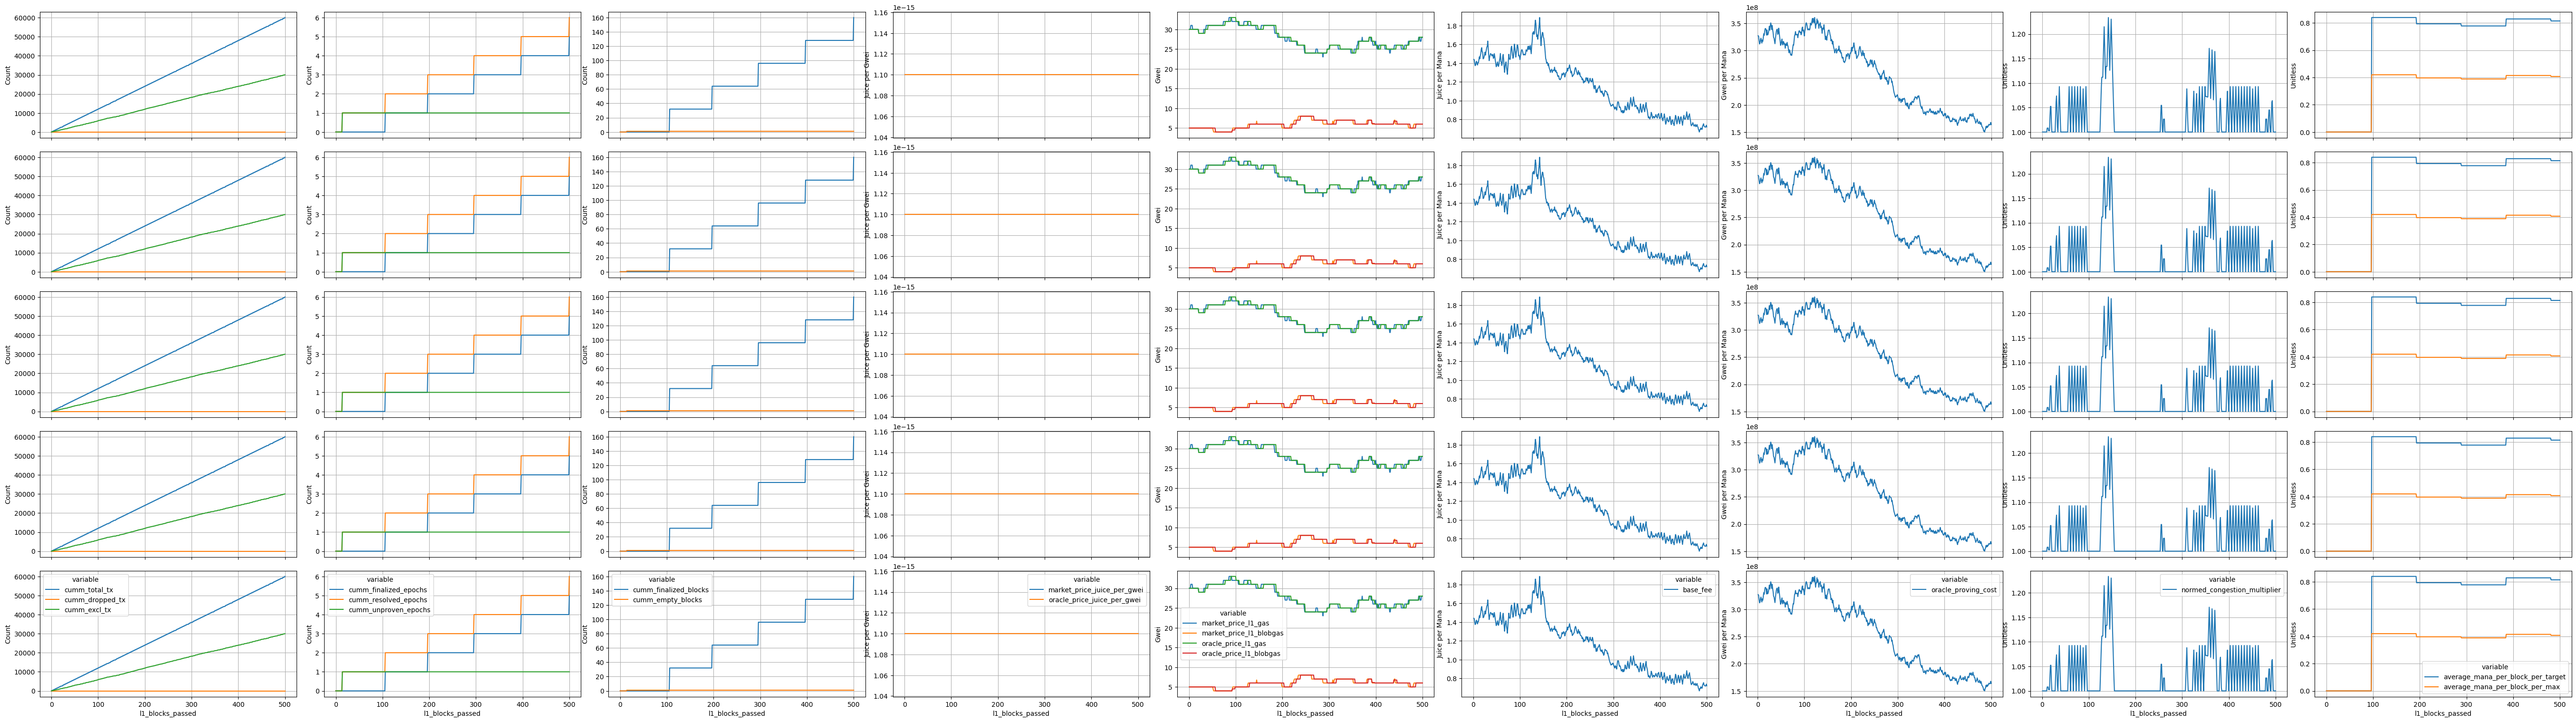

In [27]:
plot_inspect_vars(sim_df[sim_df.JUICE_PER_GWEI_SCENARIO == JuiceGweiExchangeRateScenario.Constant])